In [7]:
import pandas as pd
import seaborn as sns
import gc
import matplotlib.pyplot as plt
%matplotlib inline

gc.collect()

118

0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'

In [8]:
combDF = pd.read_csv("../data/combDF.csv")
combDF['timestamp'] = pd.to_datetime(combDF.timestamp)
combDF.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
1,0,1,Education,2720,2004.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
2,0,2,Education,5376,1991.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
3,0,3,Education,23685,2002.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
4,0,4,Education,116607,1975.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1


In [9]:
combDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20125605 entries, 0 to 20125604
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   site_id             int64         
 1   building_id         int64         
 2   primary_use         object        
 3   square_feet         int64         
 4   year_built          float64       
 5   floor_count         float64       
 6   meter               int64         
 7   timestamp           datetime64[ns]
 8   meter_reading       float64       
 9   air_temperature     float64       
 10  cloud_coverage      float64       
 11  dew_temperature     float64       
 12  precip_depth_1_hr   float64       
 13  sea_level_pressure  float64       
 14  wind_direction      float64       
 15  wind_speed          float64       
 16  hour                int64         
 17  weekday             int64         
 18  month               int64         
dtypes: datetime64[ns](1), float64(10), int64

In [10]:
len(combDF[combDF['meter_reading'] <= 0])

1867887

In [11]:
len(combDF[combDF['meter_reading'] < 0])/len(combDF.index)

0.0

In [12]:
len(combDF[combDF['meter_reading'] <= 0])/len(combDF.index)

0.09281147076075477

9.3% of values are zero

In [13]:
g = combDF.groupby(['building_id','meter'],as_index=False)[['meter_reading']].apply(lambda x: x[x == 0].count()/x.count()).reset_index()
isinstance(g,pd.DataFrame)
#g.reset_index(level=['building_id','meter'],inplace=True)
g.groupby('meter').describe()
#do boxplot

building_id                                                           \
            count         mean         std    min     25%     50%      75%   
meter                                                                        
0          1413.0   714.958953  418.115709    0.0  353.00   706.0  1073.00   
1           498.0   890.574297  437.162240    7.0  747.25   992.5  1249.75   
2           324.0  1115.043210  203.054244  745.0  940.00  1136.0  1296.25   
3           145.0   738.131034  510.722137  106.0  212.00  1003.0  1255.00   

              meter_reading                                               \
          max         count      mean       std  min       25%       50%   
meter                                                                      
0      1448.0        1413.0  0.043903  0.119885  0.0  0.000000  0.000000   
1      1413.0         498.0  0.154577  0.227096  0.0  0.005546  0.028910   
2      1442.0         324.0  0.126838  0.196130  0.0  0.008466  0.028500   
3      1331.0         145.0  0.269017  0.294540  0.0  0.011522  0.132164   

                           
            75%       max  
meter                      
0      0.015486  0.935206  
1      0.208923  0.999886  
2      0.138303  0.971744  
3      0.482861  0.995104

In [14]:
g[g>0.95].count()/g.count()

building_id      0.999580
meter            0.406303
meter_reading    0.002521
dtype: float64

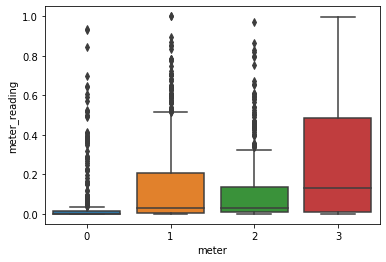

In [15]:
#make boxplot by meter type
sns.boxplot(data=g,x='meter', y='meter_reading')

In [19]:
g[(g.meter_reading>0.6) & (g.meter == 1)].count()

building_id      38
meter            38
meter_reading    38
dtype: int64

In [21]:
x = g[(g.meter_reading>0.6) & (g.meter == 1)]

In [22]:
elect_meters = x.building_id
elect_meters

408      252
425      259
971      765
1000     778
1031     795
1037     797
1046     800
1055     803
1318     954
1438    1000
1441    1001
1460    1013
1469    1018
1476    1022
1484    1028
1489    1030
1492    1031
1495    1032
1548    1077
1553    1079
1583    1093
1586    1094
1589    1095
1595    1098
1640    1122
1654    1130
1712    1158
1718    1160
1720    1161
1733    1167
1817    1211
1828    1216
1830    1217
1835    1219
1885    1237
2128    1324
2171    1342
2297    1398
Name: building_id, dtype: int64

can remove all of these

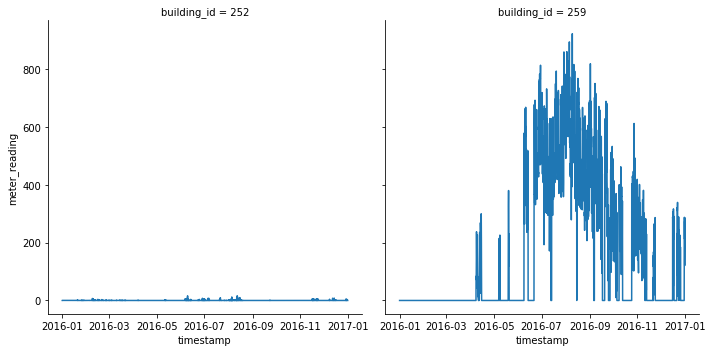

In [24]:
x=combDF[(combDF.building_id.isin(elect_meters[0:2])) & (combDF.meter == 1)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

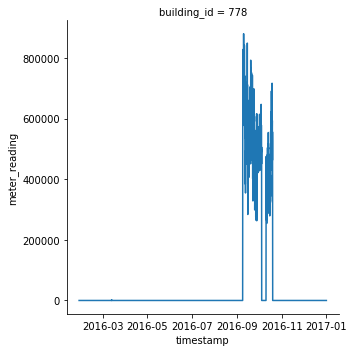

In [34]:
x=combDF[(combDF.building_id==778) & (combDF.meter == 1)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

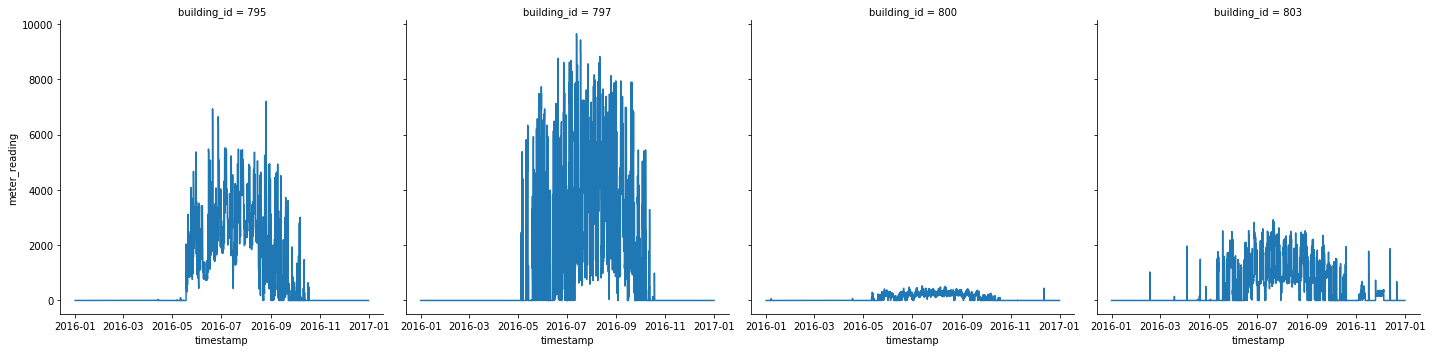

In [30]:
x=combDF[(combDF.building_id.isin(elect_meters[4:8])) & (combDF.meter == 1)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

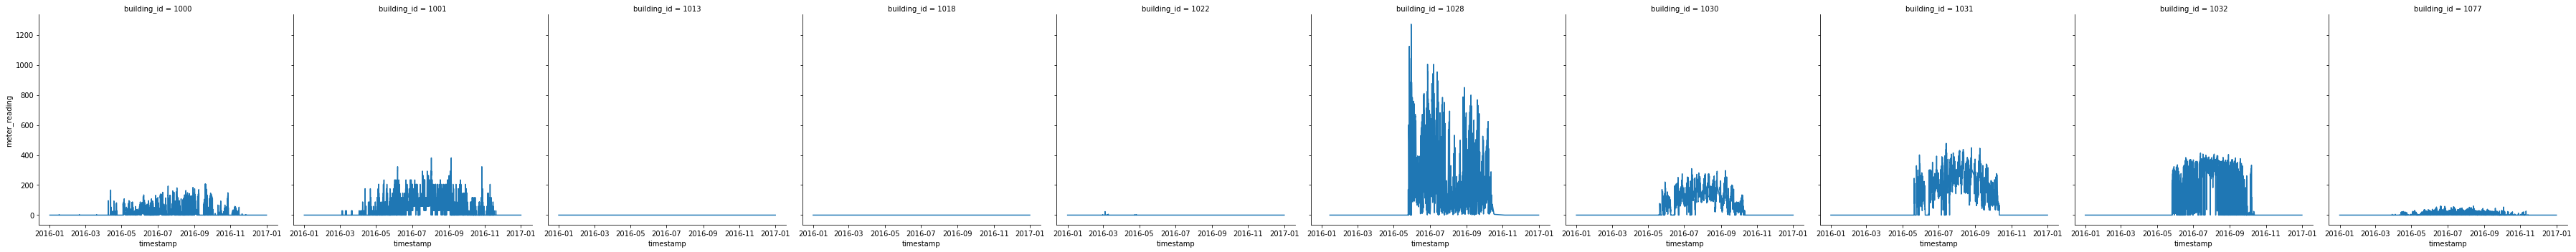

In [35]:
x=combDF[(combDF.building_id.isin(elect_meters[9:19])) & (combDF.meter == 1)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

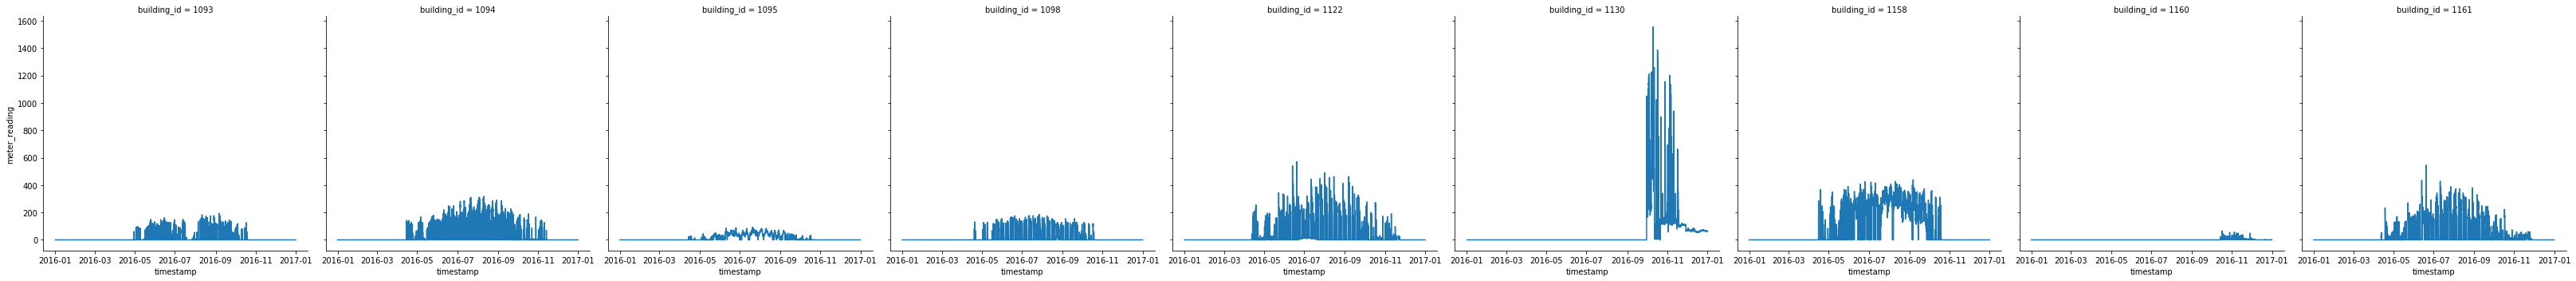

In [36]:
x=combDF[(combDF.building_id.isin(elect_meters[20:29])) & (combDF.meter == 1)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

In [69]:
h = combDF.groupby(['building_id','meter'],as_index=False)[['meter_reading']].apply(lambda x: x[x == 0].count()/x.count()).reset_index()
isinstance(g,pd.DataFrame)
#g.reset_index(level=['building_id','meter'],inplace=True)
h.describe()
#do boxplot

,building_id,meter,meter_reading
count,2380.000000,2380.000000,2380.000000
mean,807.582353,0.664286,0.092066
std,429.858323,0.928002,0.184519
min,0.000000,0.000000,0.000000
25%,404.750000,0.000000,0.000000
50%,900.000000,0.000000,0.005254
75%,1194.250000,1.000000,0.057907
max,1448.000000,3.000000,0.999886


# Conclusion
- remove any with a max value lower than X
- don't use amount of zeros to measure issues because most seem to be timed correctly
- also remove some based on pattern